<a href="https://colab.research.google.com/github/copy-del/practice-project-study/blob/eh%2Fmachine_learning/EX01)_%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EB%A5%98(%EC%9D%B4%EC%A7%84_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

목표
- 유방암 데이터셋을 활용한 유방함예측 모델링(이진분류)

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer #학습용 자료
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [81]:
breast_data = load_breast_cancer()
breast_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [82]:
breast_data = load_breast_cancer()
breast_data
#sklearn 제공 데이터셋
#번치객체(딕셔너리처럼 사용)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [83]:
#유방암 데이터 키값 확인
breast_data.keys()
#data : X (입력 특성)
#target : y
#target_names : 정답 클래스명
#feature_names : 특성명(컬럼명)
#DESCR : 데이터에 대한 설명 자료

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [84]:
breast_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [85]:
#X, y 데이터 분리

X = breast_data.data #문제 데이터
y = breast_data.target #정답 데이터

In [86]:
X.shape

(569, 30)

In [87]:
pd.Series(y).value_counts()

,count
1,357
0,212


<Axes: >

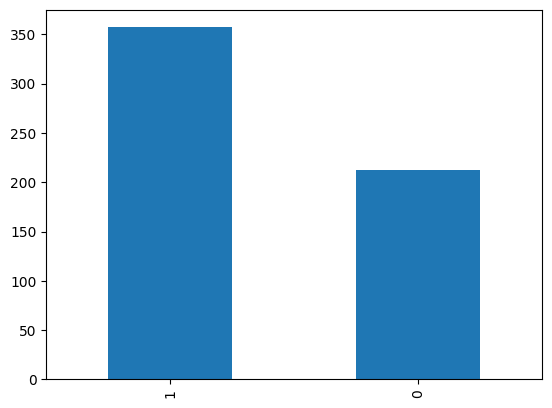

In [88]:
pd.Series(y).value_counts().plot.bar()

In [89]:
pd.Series(y).value_counts(normalize=True)

,proportion
1,0.627417
0,0.372583


In [90]:
#train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2025)

# stratify = y, train과 test 데이터 클래스 비율을 동일하게 유지하여 분할

1. 문제정의
2. 데이터 수집
3. 데이터 전처리
4. 탐색적 데이터 분석
5. 모델 선택, 하이퍼파라미터 튜닝
6. 학습
7. 평가

- 머신러닝은 3~4단계에 시간을 집중적으로 사용
  - 특성 공학은 머신러닝 학습과정 자체에서는 불가능
- 딥러닝의 경우 딥러닝 자체에서 특성공학이 가능
  - 3, 4단계의 이상치, 결측치 제거 등의 과정이 짧다.

In [91]:
# 도구 불러오기
from tensorflow.keras.models import Sequential #딥러닝 모델 뼈대
from tensorflow.keras.layers import InputLayer, Dense  #딥러닝 모델 세부 설계 (층)

In [92]:
import tensorflow as tf
print(tf.__version__)

2.18.0


- 각 층에서 뉴런의 개수를 정하는 데 몇 가지 일반적인 가이드라인 존재
- 하지만, 최적의 뉴런 개수는 문제의 특성, 데이터의 특성 모델의 목적에 따라 달라질 수 있음.
- 뉴런(unit)의 개수의 참고용 기준
  - 입력 특성의 개수가 많은 경우, 첫번째 은닉층의 뉴런 수를 더 크게 설정
  - 고차원 데이터의 경우, 더 많은 뉴런이 필요할 수 있다.
  - 은닉층의 개수를 늘리면, 복잡한 패턴 학습에 도움이 될 수 있으나 과대적합이 발생할 수 있다.

### 일반적인 경험적 규칙
- 첫번째 은닉층 : 입력 특성의 수와 유사한 개수의 뉴런으로 시작
- 은닉층의 뉴런 수 줄이기 : 보통 첫번째 은닉층 이후의 층에서 뉴런 수를 점진적으로 줄이는 방법을 사용
- 과대적합 방지 : 뉴런의 수가 너무 많으면, 과대적합의 위험이 있으므로, 적절한 정규화 기법(예:L1, L2 정규화) 사용 가능

- 교차 검증
- 그리드 서치
- 조기종료(eaarlyStopping)

In [93]:
model = Sequential()

# 입력층: Sequential에 쌓는 첫번째 층, 뉴런 수는 특성의 개수
model.add(InputLayer(input_shape=(30,)))

# 다층퍼셉트론 구현
# 은닉층(중간층): 입력층과 출력층을 제외한 다른 모든 층
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=128, activation='sigmoid'))
model.add(Dense(units=64, activation='sigmoid'))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=16, activation='sigmoid'))

# 뉴런 개수를 정하는 특별한 기준은 없음
# 층을 구성하는 데에는 상당한 경험이 필요
# 일반적 경험에 의하면 효율적 방법 있음
# 항아리 모양 : 입력층 : 32 -> 2층, 64-> 3층, 32 -> 4층, 16 -> 출력층 : 1

# 출력층 : 가장 마지막에 있는 층, 결과를 종합하는 층 / unit 수 = 예측하고 싶은 수(각각의 확률값)
# 출력층에서 사용하는 활성화 함수
# 이진분류 = sigmoid
# 다중분류 = softmax(각각의 확률)
# 회귀 = linear
model.add(Dense(units=1, activation='sigmoid'))


In [94]:
# 학습 방법 및 평가 방법 설정
model.compile(loss='binary_crossentropy',
              optimizer = 'SGD', # 최적화 방법 : 확률적 경사하강법
              metrics=['accuracy'])

In [95]:
# 모델 학습
h = model.fit(X_train, y_train,
              validation_split = 0.3,
              epochs = 100) # 반복 학습 횟수

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.6767 - loss: 0.6776 - val_accuracy: 0.5750 - val_loss: 0.6849
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6590 - loss: 0.6707 - val_accuracy: 0.5750 - val_loss: 0.6829
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6672 - loss: 0.6617 - val_accuracy: 0.5750 - val_loss: 0.6820
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6421 - loss: 0.6631 - val_accuracy: 0.5750 - val_loss: 0.6819
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6655 - loss: 0.6523 - val_accuracy: 0.5750 - val_loss: 0.6824
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6451 - loss: 0.6564 - val_accuracy: 0.5750 - val_loss: 0.6831
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6853 - loss: 0.6381 - val_accuracy: 0.5750 - val_loss: 0.6839
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6519 - loss: 0.6506 - val_accuracy: 0.5750 - val_loss:

In [96]:
# 모델 평가
model.evaluate(X_test, y_test)

# 손실값, 정확도

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6399 - loss: 0.6537 


[0.6625010371208191, 0.6257309913635254]

#### 손실함수(Loss Function) 설정
1. binary_crossentropy(이항 교차 엔트로피)
- y값이 이진분류인 경우 사용되는 손실함수            

2. categorical_crossentropy (범주형 교차 엔트로피)
- y값이 다중분류인 경우 사용되는 손실함수
- 활성화함수로는 softmax
- 라벨이 (0,1,0,0), (0,0,1,0)과 같이 원핫 인코딩된 형태로 제공된 경우 활용

3. sparse_categorical_crossentropy
- y값이 다중분류인 경우 사용되는 손실함수
- 활성화함수로는 softmax
- 라벨이 (1,2,3,4)인 경우 사용


4. mean_squared_error(평균 제곱 오차)
- y값이 연속형인 경우 사용되는 손실함수
- 가장 흔하게 쓰임
- 대체로는 MAE(평균 절대 오차), RMSE


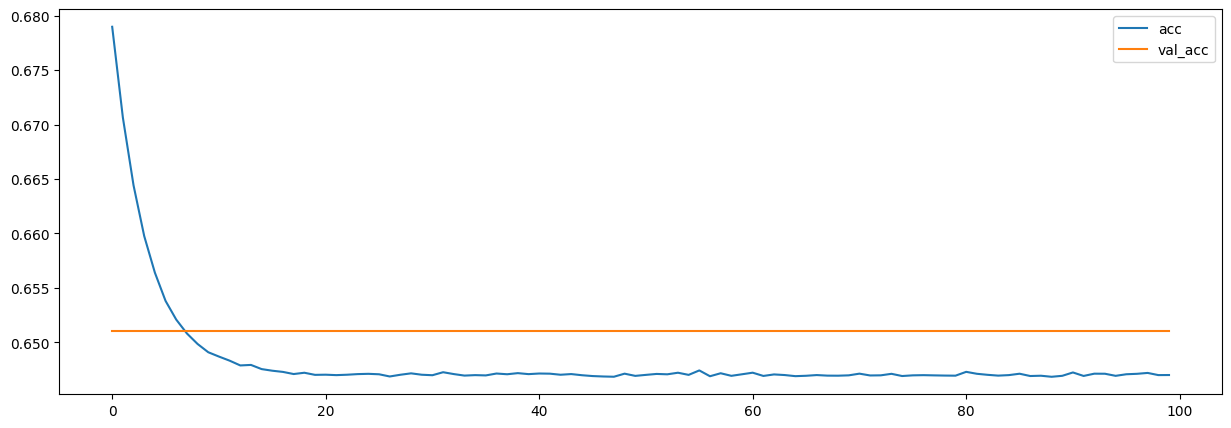

In [97]:
#시각화
plt.figure(figsize=(15,5))
plt.plot(h.history['loss'], label='acc')
plt.plot(h.history['accuracy'], label='val_acc')
plt.legend()
plt.show()

In [98]:
h.history['accuracy']

[0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182518005,
 0.6510791182

In [99]:
model2 = Sequential()

# 입력층: Sequential에 쌓는 첫번째 층, 뉴런 수는 특성의 개수
model2.add(InputLayer(input_shape=(30,)))

# 다층퍼셉트론 구현
# 은닉층(중간층): 입력층과 출력층을 제외한 다른 모든 층
model2.add(Dense(units=32, activation='relu'))
model2.add(Dense(units=64, activation='relu'))
model2.add(Dense(units=128, activation='relu'))


# 출력층 : 가장 마지막에 있는 층, 결과를 종합하는 층 / unit 수 = 예측하고 싶은 수(각각의 확률값)
model2.add(Dense(units=1, activation='sigmoid'))


In [100]:
# 학습 방법 및 평가 방법 설정
model2.compile(loss='binary_crossentropy',
              optimizer = 'adam', # 최적화 방법 : 확률적 경사하강법
              metrics=['accuracy'])

In [101]:
# 모델 학습
h = model2.fit(X_train, y_train,
              validation_split = 0.3,
              epochs = 100) # 반복 학습 횟수

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.5326 - loss: 6.4606 - val_accuracy: 0.4167 - val_loss: 2.4998
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5795 - loss: 1.9139 - val_accuracy: 0.7000 - val_loss: 1.2090
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7269 - loss: 1.0952 - val_accuracy: 0.8167 - val_loss: 1.0459
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8114 - loss: 0.5276 - val_accuracy: 0.8333 - val_loss: 1.4712
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8926 - loss: 0.3806 - val_accuracy: 0.8583 - val_loss: 1.0548
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8249 - loss: 0.7177 - val_accuracy: 0.8417 - val_loss: 1.1311
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8664 - loss: 0.4586 - val_accuracy: 0.8333 - val_loss: 1.7608
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8528 - loss: 0.6904 - val_accuracy: 0.7583 - val_loss:

In [102]:
# 초기 및 에포크 동안 정확도 급격하게 변화
# 에포크가 진행될수록 불안정한 구간도 있지만, 점차 안정화를 되찾아감

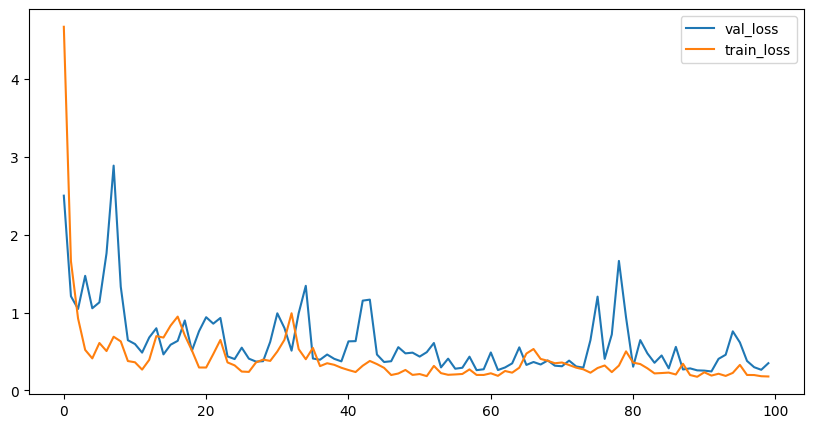

In [103]:
#학습 결과 시각화
plt.figure(figsize=(10,5))

h.history['loss'], h.history['val_loss']

plt.plot(h.history['val_loss'], label='val_loss')

plt.plot(h.history['loss'], label='train_loss')
plt.legend() #범례
plt.show()

# 초기 에포크 동안 손실 값(loss)이 급격히 변동
# 이는 모델이 초기 학습 단계에서 최적의 가중치 값을 찾기 위해 많은 조정이 이루어지기 때문.